<a href="https://colab.research.google.com/github/meherkalsi13-png/ds3001_final_project_group_g/blob/main/DS3001_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install package and import the dataset to code**

In [1]:
%pip install ucimlrepo


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
risk_factor_prediction_of_chronic_kidney_disease = fetch_ucirepo(id=857)

# data (as pandas dataframes)
x = risk_factor_prediction_of_chronic_kidney_disease.data.features.copy()
y = risk_factor_prediction_of_chronic_kidney_disease.data.targets.copy()

# metadata
print(risk_factor_prediction_of_chronic_kidney_disease.metadata, '\n')

# variable information
print(risk_factor_prediction_of_chronic_kidney_disease.variables)

{'uci_id': 857, 'name': 'Risk Factor Prediction of Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv', 'abstract': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 200, 'num_features': 28, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5WP64', 'creators': ['Md. Ashiqul Islam', 'Shamima Akter'], 'intro_paper': {'ID': 268, 'type': 'NATIVE', 'title': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine L

**Metadata**: '**uci_id**': 857, '**name**': 'Risk Factor Prediction of Chronic Kidney Disease', '**repository_url**': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv',

'**abstract**': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.',

  '**area**': 'Health and Medicine', '**tasks**': ['Classification', 'Regression'],  '**characteristics**': ['Multivariate'],
  '**num_instances**': 200,
  '**num_features**': 28,
  '**feature_types**': ['Real'],
  '**demographics**': [],
  '**target_col**': ['class'],
  '**index_col**': None,
  '**has_missing_values**': 'no',
  '**missing_values_symbol**': None,
  '**year_of_dataset_creation**': 2020,
  '**last_updated**': 'Fri Mar 08 2024',
  '**dataset_doi**': '10.24432/C5WP64',
  '**creators**': ['Md. Ashiqul Islam', 'Shamima Akter'],


'**intro_paper**':
  '**ID**': 268,
  '**type**': 'NATIVE',
  '**title**': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms',
  '**authors**': 'M. Islam, S. Akter, M. Hossen, Sadia Ahmed Keya, Sadia Afrin Tisha, Shahed Hossain',
  '**venue**': 'International Conferences on Information Science and System',
  '**year**': 2020,
  '**journal**': None,
  '**DOI**': None,
  '**URL**': 'https://www.semanticscholar.org/paper/a4b90dd7b9dfaffa9eff1efc6555bbce62a963d7',
  '**sha**': None,
  '**corpus**': None,
  '**arxiv**': None,
  '**mag**': None,
  '**acl**': None,
  '**pmid**': None,
  '**pmcid**': None},

'**additional_info**':
  '**summary**': 'This dataset is real Bangladeshi patient data. The dataset is collected from Enam Medical College, Savar, Dhaka, Bangladesh.\n',
  '**purpose**': None,
  '**funded_by**': None,
  '**instances_represent**': None,
  '**recommended_data_splits**': None,
  '**sensitive_data**': None,
  '**preprocessing_description**': 'This dataset is not pre-processed, if you want to apply a Machine learning Algorithm at first you have to need to pre-process the data',
  '**variable_info**': '1. bp(Diastolic)\n2. bp limit\n3. sg\n4. al\n5. class\n6. rbc\n7. su\n8. pc\n9. pcc\n10. ba\n11.bgr\n12. bu\n13. sod\n14. sc\n15. pot\n16. hemo\n17. pcv\n18. rbcc\n19. wbcc\n20. htn\n21. dm\n22. cad\n23. appet\n24. pe\n25. ane\n26. grf\n27. stage\n28. affected\n29. age',
  '**citation**': "M. A. Islam, S. Akter, M. S. Hossen, S. A. Keya, S. A. Tisha and S. Hossain, 'Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms,' 2020 3rd International Conference on Intelligent Sustainable Systems (ICISS), Thoothukudi, India, 2020, pp. 952-957, doi: 10.1109/ICISS49785.2020.9315878."


In [3]:
x = x.drop(columns=['bp (Diastolic)', 'bp limit']) #drop both columns because the data does not make sense to be binary - they should be int or float so we remove the columns

x['stage'] = x['stage'].str.replace('s', '').astype(int) #remove 's' from stage to allow the values to be numeric
y['class'] = (
    y['class']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'ckd': 1, 'notckd': 0})
)

display(x.head()) #X is the different measurements of the patients
display(y.head()) #Y is the class (whether there is chronic kidney disease or not)



,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1.019 - 1.021,1-Jan,0,< 0,0,0,0,< 112,< 48.1,138 - 143,...,0,0,0,0,0,0,≥ 227.944,1,1,< 12
1,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,...,0,0,0,0,0,0,≥ 227.944,1,1,< 12
2,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,...,0,0,0,1,0,0,127.281 - 152.446,1,1,< 12
3,1.009 - 1.011,3-Mar,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,...,0,0,0,0,0,0,127.281 - 152.446,1,1,< 12
4,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,...,0,1,0,1,1,0,127.281 - 152.446,1,1,20-Dec


,class
0,1
1,1
2,1
3,1
4,1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Data Cleaning 

In [5]:
def clean_numeric(val):
    """
    Convert messy numeric entries to floats.
    Handles cases like:
    - '1.009 - 1.011'
    - '< 0'
    - '≥ 227.944'
    - '12 - 18'
    - 'discrete', 'meta', NaN → np.nan
    """
    if pd.isna(val):
        return np.nan
    
    s = str(val).strip()
    
    #remove known non-values
    if s in ['discrete', 'meta', 'nan']:
        return np.nan
    
    # "< 0" → 0
    if "<" in s:
        return 0.0
    
    # "≥ 227.944" → 227.944
    if "≥" in s:
        return float(s.replace("≥","").strip())
    
    #range: "1.009 - 1.011"
    if "-" in s:
        parts = s.split("-")
        try:
            nums = [float(p.strip()) for p in parts]
            return np.mean(nums)  # midpoint
        except:
            return np.nan
    
    #pure number
    try:
        return float(s)
    except:
        return np.nan

In [6]:
#identify numeric-like columns from the dataset
numeric_cols = [
    col for col in x.columns
    if any(keyword in col.lower() for keyword in 
           ["sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","grf","age"])
]

#apply cleaning 
for col in numeric_cols:
    if col in x.columns:
        x[col] = x[col].apply(clean_numeric)

In [7]:
#clean catagorical data
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'normal': 0, 'abnormal': 1,
    'good': 0, 'poor': 1,
    '0': 0, '1': 1
}

binary_cols = ['rbc','pc','pcc','ba','htn','dm','cad','pe','ane','appet']

for col in binary_cols:
    if col in x.columns:
        x[col] = (
            x[col]
            .astype(str)
            .str.lower()
            .map(binary_map)
        )

In [8]:
#Data imputation
#filling numeric missing values with column median
for col in x.columns:
    if x[col].dtype != "object":
        x[col] = x[col].fillna(x[col].median())

# one hot encode remaining categorical columns
x = pd.get_dummies(x, drop_first=True)

Data Prep for Model

In [9]:
y_series= y['class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    x, y_series, test_size=0.2, random_state=42, stratify=y
)

#scale continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EDA

In [13]:
#make copy of df for safety during EDA
df = x.copy()
df['class'] = y['class']

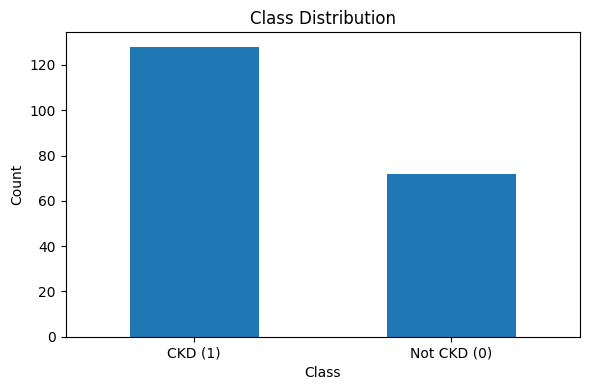

In [14]:
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1], labels=['CKD (1)', 'Not CKD (0)'], rotation=0)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

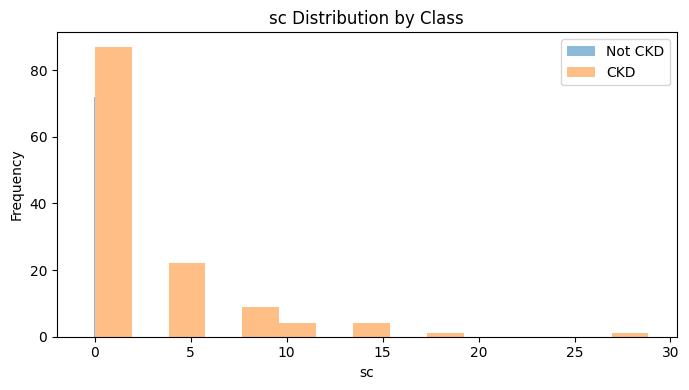

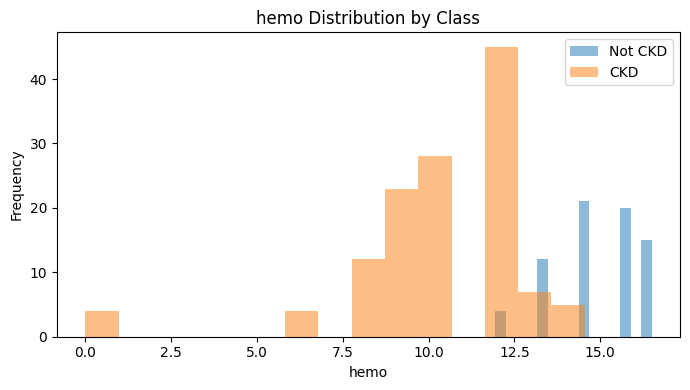

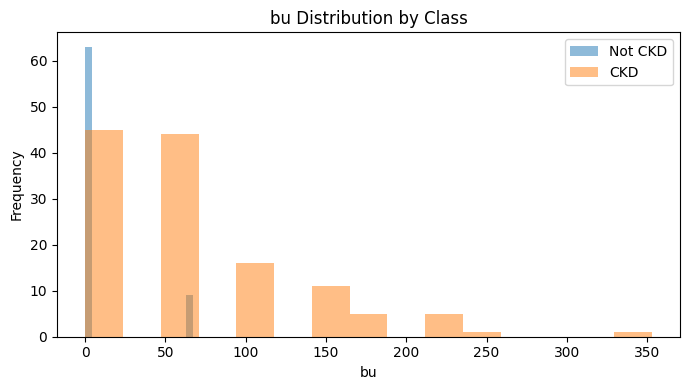

In [15]:
key_numeric = ['sc', 'hemo', 'bu']

for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        for label, subset in df.groupby('class'):
            label_name = 'CKD' if label == 1 else 'Not CKD'
            plt.hist(
                subset[col].dropna(), 
                bins=15, 
                alpha=0.5, 
                label=label_name
            )
        plt.title(f'{col} Distribution by Class')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [16]:
group_means = df.groupby('class')[key_numeric].mean()
print(group_means)


             sc       hemo         bu
class                                
0      0.000000  14.956250   8.393750
1      2.670313  10.469531  68.992188


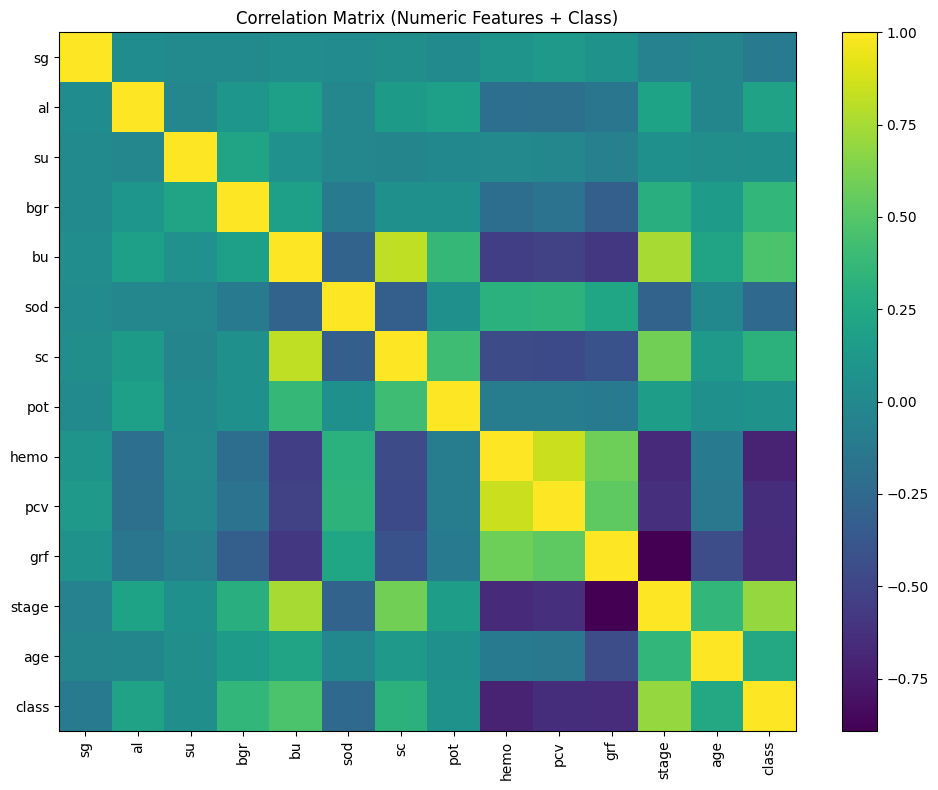

In [17]:
numeric_for_corr = df[numeric_cols + ['class']].copy()
corr = numeric_for_corr.corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix (Numeric Features + Class)')
plt.tight_layout()
plt.show()